# Media Company Case Study

A digital media company has launched a media show. Initialy, the show got a good response, but then witnessed a decline in viwership. The company wants to figure out what went wrong.

In [1]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing Dataset
media = pd.read_csv('mediacompany.csv')
media = media.drop('Unnamed: 7', axis=1)

In [3]:
# Exploring the data
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


In [4]:
# Converting data to pandas datetime
media['Date'] = pd.to_datetime(media['Date'])


In [5]:
# Deriving  "days since the show started"
from datetime import date

media['day'] = (media.Date - pd.datetime(2017, 2, 28)).dt.days

media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5


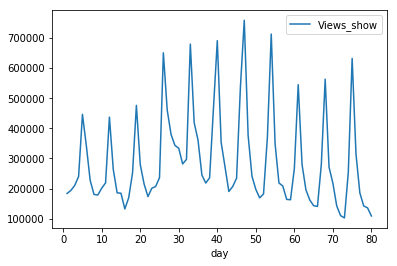

In [6]:
# Days vs views show
media.plot.line(x='day',y='Views_show')

C:\Users\Artu\Anaconda3\lib\site-packages\matplotlib\legend.py:640: UserWarning: Unrecognized location "best ". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


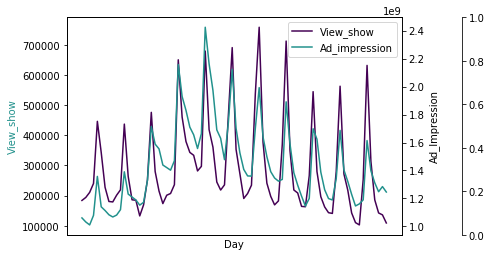

In [7]:
# Plot for days vs views_show and days vs ad_impressions
fig = plt.figure()
host = fig.add_subplot(111)

par1 = host.twinx()
par2 = host.twinx()

host.set_xlabel("Day")
host.set_ylabel("View_show")
par1.set_ylabel("Ad_Impression")

color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.5)
color3 = plt.cm.viridis(.9)

p1, = host.plot(media.day, media.Views_show, color=color1, label="View_show")
p2, = par1.plot(media.day, media.Ad_impression, color=color2, label="Ad_impression")

lns = [p1, p2]
host.legend(handles=lns, loc='best ')

#right, left, top, bottom
par2.spines['right'].set_position(('outward',60))
#no x-ticks
par2.xaxis.set_ticks([])

host.yaxis.label.set_color(p1.get_color())
host.yaxis.label.set_color(p2.get_color())

plt.savefig("pyplot_multiple_y-axis.png", bbox_inches='tight')

In [8]:
#Derived metrics
# Weekdays are taken such that 1 corresponds to Sunday and 7 to Saturday
# Generate the weekday variable
media["weekday"] = (media["day"]+3)%7
media.weekday.replace(0,7, inplace=True)
media['weekday'] = media['weekday'].astype(int)
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1


## Running the first lm1 Weekday vs Visitors

In [9]:
# Creating the X and y dataframes
X = media[['Visitors','weekday']]
y = media['Views_show']


In [10]:
# importing trhe linear regression lib
from sklearn.linear_model import LinearRegression


In [11]:
# Representing LinearRegression as lm
lm = LinearRegression()

In [12]:
# fitting the model
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
import statsmodels.api as sm
# Unlike sklearn, statsmodels doesnt automaticaly fit a constant.
# In order to fit a constant, we need to use the sm.add_constant method.
X_sm = sm.add_constant(X)

lm_1 = sm.OLS(y,X_sm).fit()

print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     36.26
Date:                Thu, 13 Dec 2018   Prob (F-statistic):           8.01e-12
Time:                        21:33:51   Log-Likelihood:                -1042.5
No. Observations:                  80   AIC:                             2091.
Df Residuals:                      77   BIC:                             2098.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.862e+04   1.07e+05     -0.360      0.7

In [14]:
# Create a weekend variable, with value 1 at weekends and 0 at weekdays.

def cond(i):
    if   i % 7 == 5: return 1
    elif i % 7 == 4: return 1
    else           : return 0
    return i

media['weekend'] = [cond(i) for i in media['day']]

media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1


## Running second model (lm2) visitors vs weekends

In [15]:
# Generating the dataframes
X = media[['Visitors', 'weekend']]
y = media['Views_show']


In [16]:
# Fitting the model
import statsmodels.api as sm

X = sm.add_constant(X)
lm_2 = sm.OLS(y, X).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     38.55
Date:                Thu, 13 Dec 2018   Prob (F-statistic):           2.51e-12
Time:                        21:33:51   Log-Likelihood:                -1041.3
No. Observations:                  80   AIC:                             2089.
Df Residuals:                      77   BIC:                             2096.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.833e+04   1.01e+05     -0.875      0.3

## Running third model (lm3) visitors, weekend  and character_A

In [17]:
# Generating the DataFrame
X = media[['Visitors','weekend','Character_A']]
y = media['Views_show']


In [18]:
# Fitting the model
import statsmodels.api as sm

X = sm.add_constant(X)
lm_3 = sm.OLS(y,X).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Thu, 13 Dec 2018   Prob (F-statistic):           1.53e-14
Time:                        21:33:51   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      

In [19]:
 # Create lag variable
media['Lag_Views'] = np.roll(media['Views_show'],1)
media.Lag_Views.replace(108961, 0, inplace=True)

media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekend,Lag_Views
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0,183738
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0,193763
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1,210479
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1,240061


## Running fourth model (lm_4) visitors, Character_A, Lag_views and weekend

In [20]:
# Setting the DataFrames
X = media[['Visitors', 'Character_A','Lag_Views','weekend']]
y = media['Views_show']

In [21]:
# Running the model
import statsmodels.api as sm

X = sm.add_constant(X)
lm_4 = sm.OLS(y, X).fit()

print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     53.46
Date:                Thu, 13 Dec 2018   Prob (F-statistic):           3.16e-21
Time:                        21:33:51   Log-Likelihood:                -1015.1
No. Observations:                  80   AIC:                             2040.
Df Residuals:                      75   BIC:                             2052.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -2.98e+04   7.43e+04     -0.401      

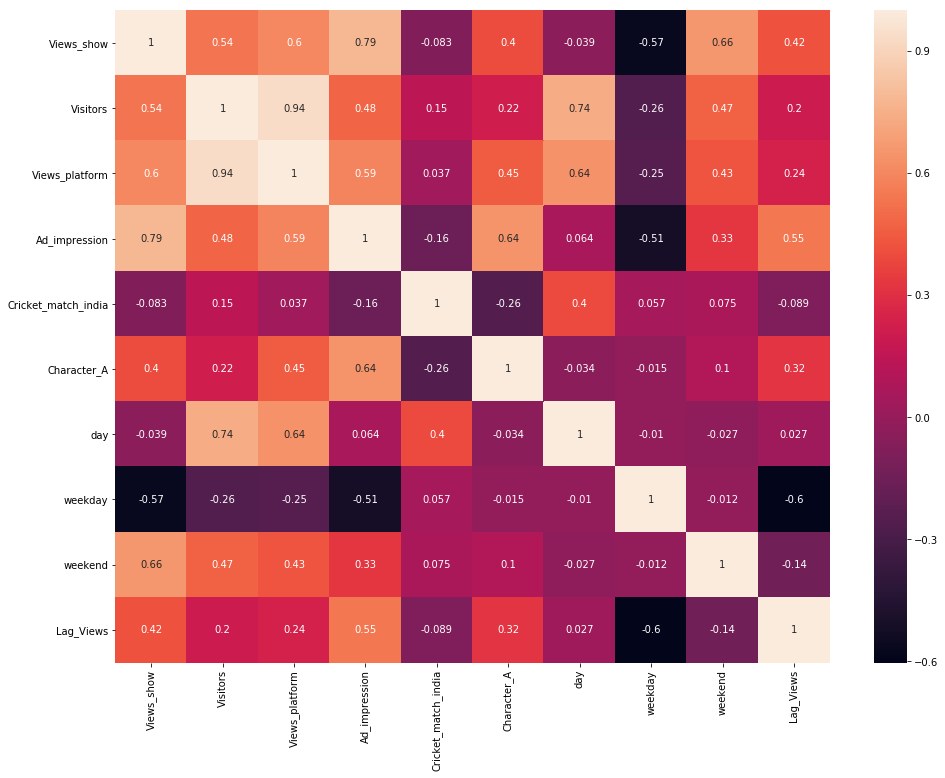

In [22]:
# Plotting heatmap
fig = plt.figure(figsize=(16,12))
sns.heatmap(media.corr(), annot=True)

## Runing model (lm_5) with character_A, weekend and views_platform


In [23]:
# Setting the DataFrames
X = media[['Character_A', 'weekend','Views_platform']]
y = media['Views_show']



In [24]:
import statsmodels.api as sm

X = sm.add_constant(X)
lm_5 = sm.OLS(y,X).fit()

print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     38.24
Date:                Thu, 13 Dec 2018   Prob (F-statistic):           3.59e-15
Time:                        21:33:51   Log-Likelihood:                -1032.3
No. Observations:                  80   AIC:                             2073.
Df Residuals:                      76   BIC:                             2082.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.205e+05   9.97e+04     -1.

## Running ther model (lm_6) with Character_A, weekend and visitors

# Setting Dataframes
X = media[['Character_A','weekend','Visitors']]
y = media['Views_show']

In [25]:
# Fitting the model
import statsmodels.api as sm

X = sm.add_constant(X)
lm_6 = sm.OLS(y,X).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     38.24
Date:                Thu, 13 Dec 2018   Prob (F-statistic):           3.59e-15
Time:                        21:33:51   Log-Likelihood:                -1032.3
No. Observations:                  80   AIC:                             2073.
Df Residuals:                      76   BIC:                             2082.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.205e+05   9.97e+04     -1.

## Running seventh model (lm_7) with Character_A, weekend, Visitors and Ad_impression

In [26]:
# Setting Dataframs
X = media[['Character_A','weekend','Visitors','Ad_impression']]
y = media['Views_show']

In [27]:
# Running model
import statsmodels.api as sm

X = sm.add_constant(X)
lm_7 = sm.OLS(y,X).fit()
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     76.40
Date:                Thu, 13 Dec 2018   Prob (F-statistic):           1.10e-25
Time:                        21:33:51   Log-Likelihood:                -1004.1
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.834e+05   6.97e+04     -4.067

## Running eight model (lm_8) with Character_A, weekend and Ad_impression

In [28]:
# Setting Dataframe
X = media[['Character_A', 'weekend', 'Ad_impression']]
y = media['Views_show']

In [29]:
# Running model
import statsmodels.api as sm

X = sm.add_constant(X)
lm_8 = sm.OLS(y,X).fit()
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Thu, 13 Dec 2018   Prob (F-statistic):           1.05e-26
Time:                        21:33:52   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.661e+05   4.74e+04     -5.609

In [30]:
# Since AD_impression is into million, lets normalise it
media['ad_impression_million'] = media['Ad_impression']/1000000

## Running ninth model (lm_9) with Character_A, weekend, ad_impression_milion and Cricket_match_india

In [31]:
# Setting Dataframes
X = media[['Character_A', 'weekend', 'Cricket_match_india', 'ad_impression_million']]
y = media['Views_show']

In [32]:
# Running model
import statsmodels.api as sm

X = sm.add_constant(X)
lm_9 = sm.OLS(y,X).fit()
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     76.59
Date:                Thu, 13 Dec 2018   Prob (F-statistic):           1.02e-25
Time:                        21:33:52   Log-Likelihood:                -1004.0
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.633e+

## Running tenth model (lm_10) with Character_A, weekend and ad_impression_million

In [33]:
# Setting Dataset
X = media[['Character_A', 'weekend', 'ad_impression_million']]
y = media['Views_show']

In [34]:
# Fitting model
import statsmodels.api as sm

X = sm.add_constant(X)
lm_10 = sm.OLS(y,X).fit()
print(lm_10.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Thu, 13 Dec 2018   Prob (F-statistic):           1.05e-26
Time:                        21:33:52   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.661e+

## Sticking with the tenth model, lets run the final model:

In [35]:
# Setting Dataframes
X = media[['Character_A', 'weekend', 'ad_impression_million']]
y = media['Views_show']

In [49]:
# Fitting the model
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

lm = LinearRegression()

X_test,X_train,y_test,y_train = train_test_split(X,y,test_size=0.7, random_state=100)

lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)



(80, 4)

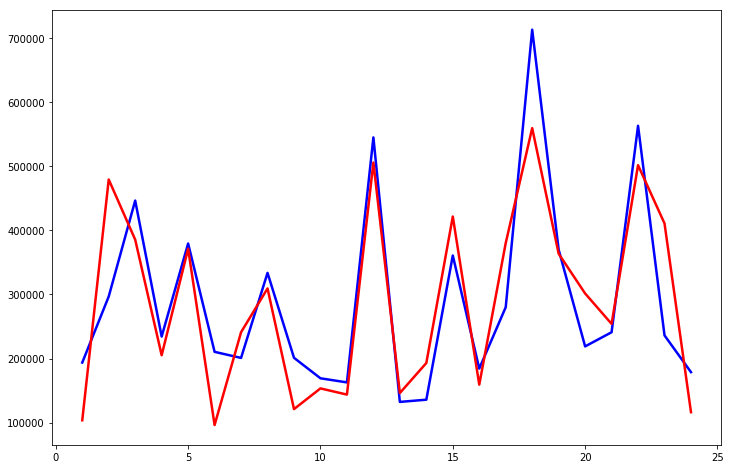

In [53]:
# Plotting some graphs
c = [i for i in range(1,25,1)]
fig = plt.figure(figsize=(12,8))
plt.plot(c, y_test, color='blue', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred, color='red', linewidth=2.5, linestyle='-')
